# 🤖  Introduction à l'autoapprentissage pour ing.

La plateforme que vous consultez actuellement est Jupyter. Vous pouvez exécuter votre code en ligne sans avoir à installer un environnement de codage sur votre ordinateur en ouvrant ce document avec Binder ou avec Noteable.

BINDER HEX

Ainsi, nous pouvons consacrer plus de temps à se concentrer sur le contenu de l'atelier plutôt qu'à essayer d'installer tout ce dont vous avez besoin sur votre système. Cependant, si vous avez besoin d'une installation locale, je recommande d'aller sur [Miniforge](https://github.com/conda-forge/miniforge) et de suivre les instructions et tutoriels. Jupyter est excellent pour interagir avec votre code et pour intercaller des cellules de texte et des cellules de code. Nous utiliserons Python pour cet atelier, car Python dispose d'un package d'auto-apprentissage assez simple et très bien documenté nommé [Scikit-Learn](https://scikit-learn.org).

Les cellules de code peuvent être exécutées en cliquant sur le triangle Play (▶️), ou en se focalisant sur la cellule de code avec le curseur et en appuyant sur Shift + Enter.

## Pourquoi l'auto-apprentissage est important pour les ingénieur.es ?

### Mécanismes et phénomènes

L'ingénierie vise à trouver des solutions en utilisant les sciences et technologies. Les mathématiques sont un terrain commun à la plupart des tâches effectuées par un.e ingénieur.e. Typiquement, nous utilisons des modèles mécanistiques pour analyser et prédire les distributions de contraintes, les écoulements de liquides, les bilans de procédés, etc. Ces modèles reposent sur des ensembles de paramètres calibrés en laboratoire. En fin de compte, la modélisation repose presque toujours sur la physique et des preuves empiriques.

Lorsqu'il s'agit de traiter la complexité, les modèles mécanistiques deviennent moins évidents. La pensée systémique, impliquant des stocks et des flux, devient difficile à régler lorsque les éléments interagissent à travers des fonctions variables dans l'espace et le temps. Puisque "tous les modèles sont faux, mais certains sont utiles", parfois un simple ensemble de régressions linéaires offrira une bonne approximation de ce qui se passe sous le capot.

Mais bien des tendances sont non-linéaires. Heureusement, en 2023, nous avons accès à des myriades d'outils pour détecter des tendances non-linéaires à travers les données. Des techniques de modélisation étonnamment simples sont capables de détecter des motifs complexes. Par exemple, vous pouvez collecter de nombreux résultats d'un milieu humide : charge d'azote, turbidité, pH, etc. Vous pouvez également collecter des données décrivant les conditions de la zone humide : apports d'eau et de nutriments, données météorologiques, % de couverture des espèces de plantes dans la zone humide, etc. Comment prédire l'un avec l'autres?

### Des centaines d'algorithmes

Pour prédire les sorties à partir des entrées, on pourrait s'appuyer sur les mécanismes de l'écosystème : calculer la mécanique des fluides, les budgets et la dynamique des nutriments avec le dépôt et l'absorption des nutriments dans les plantes, etc. Une autre approche pourrait reposer purement sur la phénoménologie avec l'auto-apprentissage. En utilisant cette approche, nous identifions les caractéristiques clés pour prédire les résultats en utilisant la détection de tendances. En d'autres termes, nous prédisons un tableau Y en utilisant un tableau X.

![](images/principe.png)

Par exemple, une technique simple appelée k-plus proches voisins (KNN) peut être utilisée pour prédire les résultats (généralement des résultats futurs) avec des caractéristiques données basées sur ce qui s'est passé dans des cas similaires : dans son approche la plus simple, KNN retournera une prédiction du résultat en moyennant les sorties des k points les plus proches des caractéristiques d'entrée. Alors qu'un modèle KNN est assez simple, les réseaux de neurones artificiels (ANN), en revanche, peuvent devenir une boîte noire complète.

#### Les k-plus proches voisins

Le principe de base des KNN est que les résultats d'une observation seront similaires aux résultats d'observations similaires, c'est-à-dire qu'un ensemble de caractéristiques retournera des valeurs ou des catégories similaires aux k retournées dans son voisinage, k étant un paramètre du modèle à optimiser. En utilisant cette approche, nous avons besoin d'une métrique de distance (euclidienne, Mahalanobis, Manhattan, Gower, etc.) - faites attention à l'influence du dimensionnement sur la métrique de distance.

La figure suivante montre, à gauche, un exemple simpliste de classification 2D, où avec les KNN (k=3 et la métrique de distance est euclidienne) la couleur prédite du cercle blanc aurait une probabilité de 66,7% d'être cyan et 33,3% d'être magenta. S'il s'agissait d'un problème de régression, le résultat prédit du cercle blanc serait la moyenne ou la médiane des points retrouvés dans le voisinage.

![](images/knn.png)

Le point blanc peut se déplacer un peu sans affecter son résultat. C'est pourquoi les résultats des KNN ne sont généralement pas lisses, mais changent par paliers.

#### Les arbres de décision

Un arbre de décision est une séquence hiérarchique de décisions principalement binaires. À chaque nœud, un test booléen (vrai - faux) est effectué. Le résultat prédit, qu'il s'agisse d'une catégorie ou d'un nombre, se trouve au nœud final. Les décisions et la séquence sont optimisées pour trouver le résultat le plus précis. Les arbres simples peuvent être imprimés sur papier et sont faciles à comprendre.

Dans l'exemple suivant, j'ai créé un arbre pour classifier les espèces de manchots à partir des dimensions de leur bec.

![](images/decision-tree.png)

Il existe de nombreux algorithmes basés sur les arbres de décision. Une forêt aléatoire est une collection de nombreux arbres, chacun créé à partir d'un échantillon aléatoire de données, avec remplacement. Le résultat est la moyenne de la valeur de tous les arbres ou la catégorie la plus prédite. Un algorithme populaire nommé [XGBoost](https://xgboost.readthedocs.io/en/latest/) (*extreme gradient boosting*) est également une forêt, avec des arbres modélisant séquentiellement l'erreur de l'arbre précédent.

Les résultats issus des arbres de décision et des algorithmes basés sur les arbres de décision ne sont pas lisses.

#### Réseaux de neurones

Un réseau de neurones (ou réseau de neurones artificiel) comprend une série de couches, chacune incluant des fonctions interconnectées nommées neurones. Le réseau de neurones le plus basique est un perceptron multicouche, comme celui présenté ci-dessus.

![](images/rn_principe.png)

Dans la figure précédente, chaque cercle est un neurone. Chaque couche de neurones est connectée à la couche suivante. Les connexions ont un poids fixe, qui est optimisé pour obtenir le résultat le plus précis. La première couche est l'entrée, c'est-à-dire les *features*. Chaque neurone d'une couche effectue une multiplication matricielle des neurones précédents par les poids. Habituellement, un intercept appelé le *biais* est également ajouté, mais je l'ai retiré de la figure pour simplifier. Chaque neurone applique également une fonction qui transforme le résultat de la multiplication matricielle. Dans cet exemple, j'ai utilisé une fonction simple appelée unité linéaire rectifiée (ReLU), qui transforme les valeurs négatives en zéros. Il existe de nombreuses fonctions disponibles, chacune avec ses avantages et inconvénients, mais la fonction ReLU est connue pour donner de très bons résultats. Ces fonctions peuvent différer d'un neurone à l'autre, ou d'une couche à l'autre, mais utiliser la même fonction pour l'ensemble du réseau est généralement suffisant.

Pour démystifier les réseaux de neurones, calculons-en un simple à la main (sans le *biais*).

![](images/rn_exemple_rempli.png)

Les réseaux de neurones peuvent avoir des centaines de couches avec des centaines de neurones par couche. Les réseaux peuvent être assemblés de toutes sortes de manières, par exemple en prenant la sortie d'un réseau comme entrée d'un autre. La façon dont ils sont arrangés est appelée l'architecture du réseau. Lorsque ces réseaux deviennent profonds, nous faisons référence à cette technique sous le nom d'apprentissage profond.

La classification des manchots avec des réseaux de neurones a des frontières linéaires, mais ce n'est pas le cas pour toutes les classifications avec des réseaux de neurones.

![](images/nn_peng.png)

La capacité des réseaux de neurones à apprendre des représentations de données complexes en fait un outil puissant dans de nombreux domaines, notamment la reconnaissance d'images, la traduction automatique, la conduite autonome, et bien d'autres. L'apprentissage profond a révolutionné de nombreux aspects de l'intelligence artificielle et continue d'être un domaine de recherche très actif.

Les processus gaussiens sont particulièrement intéressants car ils offrent une mesure de l'incertitude sur les prédictions, ce qui est crucial dans de nombreux domaines de l'ingénierie où l'évaluation des risques et des incertitudes est essentielle.

Les ensembles, comme leur nom l'indique, combinent les prédictions de plusieurs modèles pour améliorer la performance globale. Cette technique peut souvent produire des résultats plus robustes et précis que ceux obtenus avec un seul modèle. Les ensembles peuvent utiliser diverses méthodes, telles que le [bagging](https://fr.wikipedia.org/wiki/Bootstrap_(statistiques)), le [boosting](https://fr.wikipedia.org/wiki/Boosting), ou le [stacking](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking), pour combiner les prédictions de multiples modèles.

Auto-sklearn est un exemple d'outil d'automatisation du machine learning qui facilite la construction de ces ensembles complexes en sélectionnant automatiquement les meilleurs algorithmes et hyperparamètres. Cela peut être particulièrement utile lorsque vous explorez des données ou des problèmes avec lesquels vous n'êtes pas familiers, car cela élimine une grande partie du travail manuel et des connaissances expertes généralement nécessaires pour construire des modèles efficaces.

Cependant, même avec ces outils avancés, il est souvent utile de commencer avec des modèles simples pour comprendre les données et le problème avant de passer à des approches plus complexes.

### Conditionnement des modèles

Conditionner un modèle d'auto-apprentissage signifie observer la sortie d'un modèle en faisant varier certaines caractéristiques (généralement celles que nous pouvons contrôler) tandis que d'autres caractéristiques sont fixes (généralement des caractéristiques incontrôlables, comme la météo). Des techniques d'optimisation permettent de trouver des caractéristiques contrôlables optimales étant donné, par exemple, la météo attendue.

Dans cet atelier, je montrerai comment régler un algorithme d'auto-apprentissage pour créer un modèle et comment un modèle peut être utilisé pour le conditionnement.

Bien sûr, l'auto-apprentissage est un domaine complexe, plein de pièges et de mises en garde que je ne peux pas couvrir ici. 

Bien que j'aie fait de mon mieux pour éviter de trop m'appuyer sur des connaissances en programmation, une certaine connaissance en programmation est nécessaire pour tirer le meilleur parti de cet atelier. Si vous êtes familier avec les tableurs (e.g. Excel), vous n'en avez peut-être pas conscience, mais vous avez des compétences en programmation ! Je serai aussi concis que possible et utiliserai aussi peu de programmation que possible.

## Flux de travail typique de l'auto-apprentissage

![](images/ml_.png)

La tâche zéro consiste toujours à définir le problème et poser la question à laquelle vous devez répondre. Une fois que vous savez où vous allez, vous pouvez vous salir les mains.

### Collecte et nettoyage des données

L'auto-apprentissage, c'est des mathématiques avec des données. Des algorithmes clé-en-main et efficaces sont généralement fournis par des packages d'auto-apprentissage comme Scikit-Learn. Mais une fois les données collectées, elles sont souvent un vrai désordre. Nettoyer les données est une tâche ennuyeuse mais cruciale dans la modélisation des données. Assurez-vous que

- chaque colonne a une seule signification avec un seul type de données (numérique, catégorielle, date, texte, booléen, etc),
- chaque ligne est une seule observation
- les valeurs manquantes sont notées de manière cohérente (généralement des cellules vides)
- les unités sont cohérentes
- etc.

### Partitionnement des données

L'auto-apprentissage n'a pas le même objectif que les statistiques classiques : il est utilisé pour la prédiction. En conséquence, la performance d'un modèle d'auto-apprentissage doit être évaluée sur des cas prédits, et non sur des cas ajustés. Typiquement, nous divisons les données entre un ensemble d'entraînement utilisé pour ajuster le modèle, et un ensemble de test utilisé pour évaluer la performance. En règle générale, les ensembles d'entraînement et de test sont divisés avec un ratio de 70/30 %, mais les proportions dépendent de l'analyse à effectuer. Les techniques de validation croisée peuvent être utilisées, mais nous ne couvrirons pas ce sujet ici.

### Prétraitement

De nombreux algorithmes d'auto-apprentissage, comme les k-plus proches voisins, dépendent fortement de l'échelle des données. Par exemple, si nous avions des coordonnées spatiales, avec les k-plus proches voisins, nous amplifierions l'importance d'une position X-Y exprimée en kilomètres par rapport à une profondeur exprimée en centimètres. Une manière typique d'exprimer toutes les colonnes dans une échelle commune est de soustraire la moyenne et de diviser par l'écart-type, un processus nommé standardisation. Le prétraitement pourrait également inclure l'imputation des valeurs manquantes et l'encodage one-hot des caractéristiques catégorielles.

### Ajuster le modèle

J'ai couvert trois des nombreuses familles d'algorithmes qui ont été développés pour l'auto-apprentissage. Certains de ces algorithmes ne peuvent prédire que des catégories, d'autres uniquement des valeurs numériques, certains les deux. Ce sont des techniques d'apprentissage supervisé, car nous ajustons les caractéristiques aux résultats. L'apprentissage non supervisé vise à prédire quelque chose qui n'existe pas encore, comme créer des groupes à travers des données a priori non classées. Les algorithmes ont leurs avantages et inconvénients.

Scikit-Learn vient avec une myriade d'algorithmes : réseaux de neurones artificiels, réseaux de neurones convolutifs (principalement pour le traitement d'images), machines à vecteurs de support (pour la classification uniquement), arbres de décision, forêts aléatoires, k-plus proches voisins, k-means clustering (pour l'apprentissage de classification non supervisée), etc.

Je préfère tendance les réseaux de neurones artificiels et les processus gaussiens pour les régressions, car ils retournent généralement une [réponse lisse](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0230888), alosr que les k-plus proches voisins ou les algorithmes basés sur des arbres génère des réponses étagées.

### Critiquer et améliorer le modèle

Une fois que vous avez votre modèle, il est judicieux d'inspecter ses performances. Certains sont très bons dès le départ, mais la plupart sont mauvais. Vraiment mauvais. Les caractéristiques doivent être élaborées, les paramètres doivent être ajustés, etc. Le modèle peut également être amélioré en continu en collectant de plus en plus de données.
Utiliser votre modèle

Vous pouvez enregistrer votre modèle, puis le réutiliser dans d'autres environnements. Certains créeront également des applications pour leurs clients avec des packages come Hex ou Streamlit.

## Codons!

### Charger les données

Nos données proviennent d'expérimentations sur des champs de cultures de bleuets réalisées au Québec, Canada. Nous visons à prédire les rendements à partir des dosages d'engrais (azote, phosphore et potassium), des données météorologiques à différentes étapes de croissance et de la chimie du sol. J'ai déjà fait le travail ennuyeux de nettoyage des données.

Dans la plupart des interfaces de calcul infonuagique, vous pouvez glisser-déposer des données au format csv (comma-separated values). Les fichiers csv sont juste un fichier texte avec des lignes séparées par des retours chariot et des colonnes séparées par des virgules.

Même si le fichier est sur le serveur, il n'est pas encore chargé dans notre environnement Python. Pour charger notre tableau de données en Python, vous avez besoin du module Polars, qui n'est généralement pas déjà installée dans les environnement de calcul (installée signifie qu'elle est téléchargée et prête à être utilisée, chargée signifie qu'elle est disponible pour la session). Un module (ou bibliothèque, ou package) ajoute des fonctionnalités aux opérations de base qui peuvent être effectuées avec Python. La bibliothèque Polars gère les tableaux de données. En Python, on peut installer les packagesde cette manière :

In [ ]:
!pip install polars seaborn

Puis, pour l'importer dans notre session,

In [2]:
import polars as pl

Cette commande importe la bibliothèque Polars et lui attribue l'alias `pl`, qui est un raccourci communément utilisé pour référencer Polars. Une fois Polars importé, vous pouvez l'utiliser pour charger des données depuis un fichier CSV dans un DataFrame, qui est la structure de données principale de pandas pour manipuler des tables.

In [3]:
df = pl.read_csv('data/df.csv', ignore_errors=True).drop_nulls()

Ce code charge le contenu de votre fichier CSV dans un DataFrame pandas, que vous pouvez ensuite utiliser pour l'analyse et le traitement de vos données. La méthode `head()` est utilisée pour afficher les premières lignes du DataFrame afin de vérifier que les données ont été chargées correctement.

In [4]:
df.head()

shape: (5, 19)
┌───────┬────────┬──────────┬────────┬───┬──────────┬──────────┬──────────┬──────────┐
│ yield ┆ dose N ┆ dose P   ┆ dose K ┆ … ┆ soil P   ┆ soil K   ┆ soil Ca  ┆ soil Mg  │
│ ---   ┆ ---    ┆ ---      ┆ ---    ┆   ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ i64   ┆ i64    ┆ f64      ┆ i64    ┆   ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞═══════╪════════╪══════════╪════════╪═══╪══════════╪══════════╪══════════╪══════════╡
│ 1591  ┆ 30     ┆ 8.733624 ┆ 25     ┆ … ┆ 0.000061 ┆ 0.000116 ┆ 0.000278 ┆ 0.00003  │
│ 901   ┆ 9      ┆ 8.733624 ┆ 25     ┆ … ┆ 0.000053 ┆ 0.00007  ┆ 0.000447 ┆ 0.000057 │
│ 1538  ┆ 60     ┆ 8.733624 ┆ 25     ┆ … ┆ 0.00003  ┆ 0.000055 ┆ 0.000294 ┆ 0.000023 │
│ 2622  ┆ 21     ┆ 8.733624 ┆ 25     ┆ … ┆ 0.000044 ┆ 0.000186 ┆ 0.00098  ┆ 0.000085 │
│ 2805  ┆ 0      ┆ 8.733624 ┆ 25     ┆ … ┆ 0.000087 ┆ 0.000121 ┆ 0.000717 ┆ 0.000062 │
└───────┴────────┴──────────┴────────┴───┴──────────┴──────────┴──────────┴──────────┘

Les données méritent d'être explorées graphiquement. Seaborn est un des nombreux package graphique en Python (mon préféré est [Lets-Plot](https://lets-plot.org/)). Pour débuter notre exploration, rien de mieux qu'un graphique bivarié.

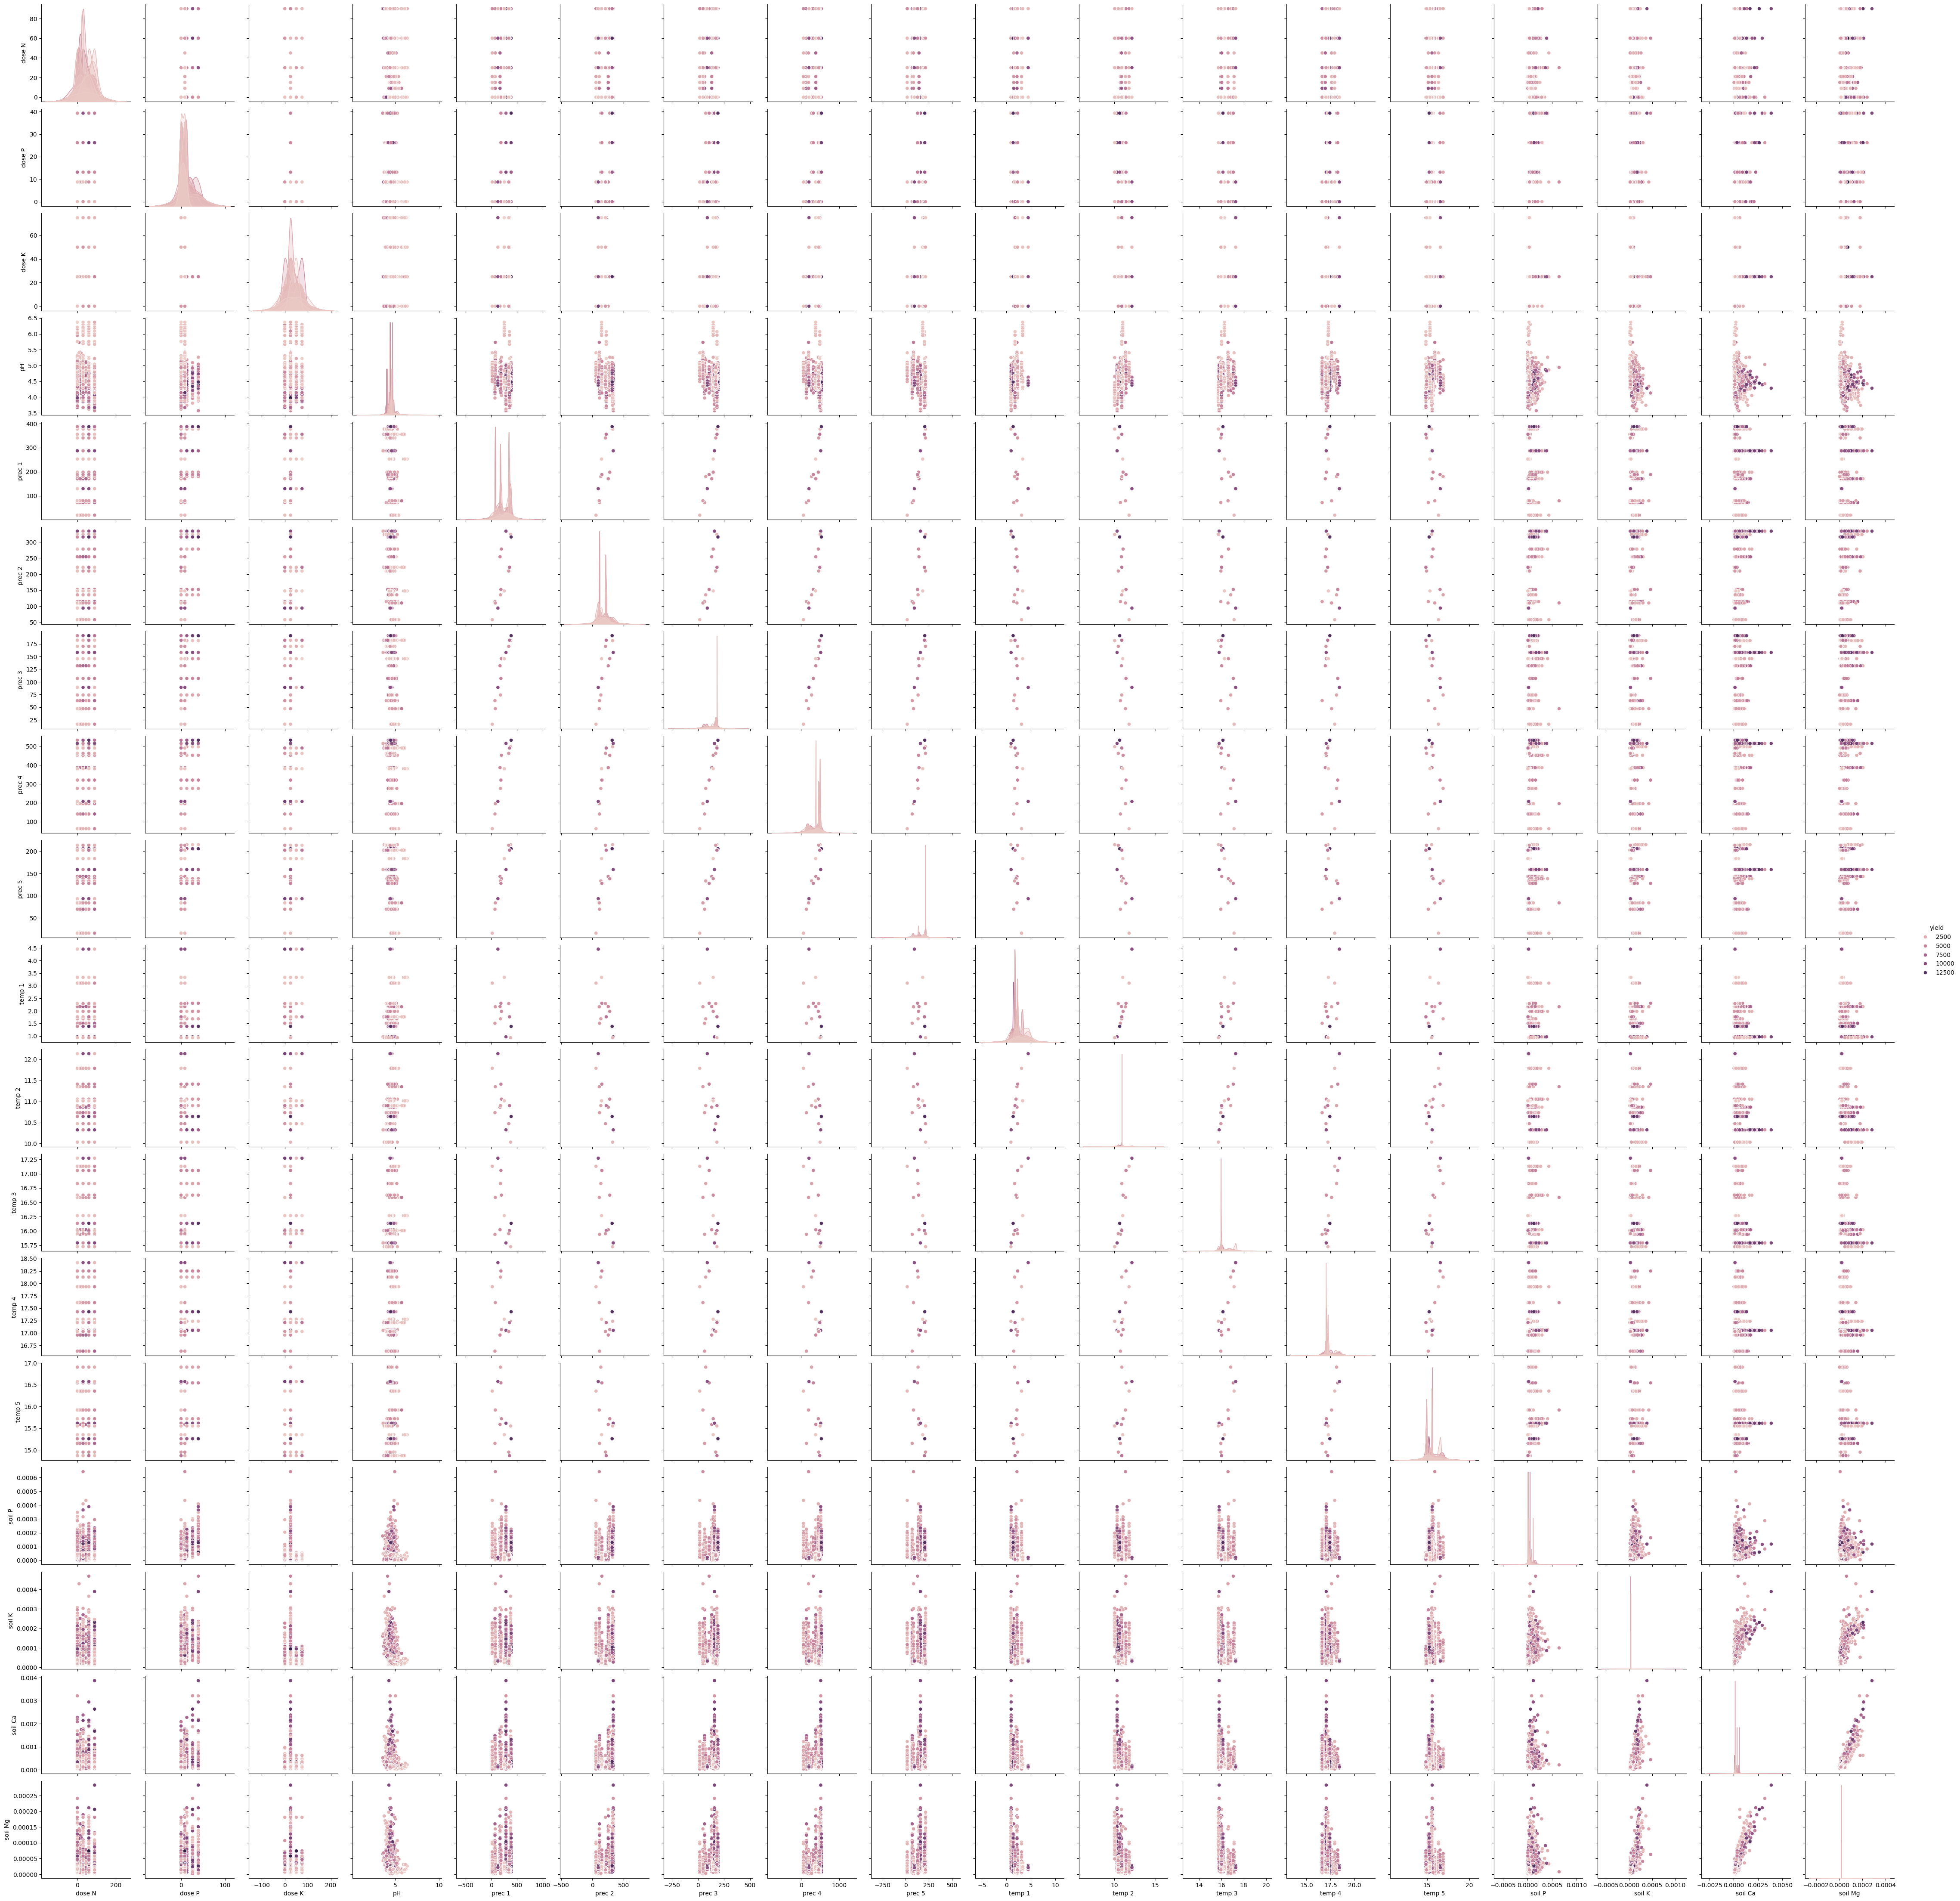

In [5]:
import seaborn as sns
sns.pairplot(df.to_pandas(), hue="yield")

Difficile d'y voir clair avec autant de variables, mais on peut remarquer certaines corrélations entre les variables météo et la chimie du sol. On pourrait explorer de concentrer l'information de ces données en un nombre limité de variables, par exemple avec une analyse en composante principale. Mais passons.

### Création des objets X et y

Pour séparer votre DataFrame en X (features) et y (target), nous allons utiliser la méthode select pour conserver des variables et drop pour en retirer.

In [6]:
y = df.select('yield')
X = df.drop('yield')

### Partitionnement des données

À partir du package Scikit-Learn, nous devons charger la fonction `train_test_split` pour partitionner nos données. Nous pouvons attribuer la sortie de la division à quatre objets (`X_train`, `X_test`, `y_train`, `y_test`) en même temps. Nous utilisons un ratio de répartition de 70/30. Pour garantir que chaque division retournera les mêmes valeurs, assurant ainsi la reproductibilité du code, j'ajoute une graine aléatoire avec le package Numpy (je génère généralement un nombre à partir de random.org pour assurer l'aléatoire). Le package Numpy est un package mathématique bien connu pour Python.

Voici comment vous pouvez partitionner vos données :

In [7]:
import numpy as np
np.random.seed(856499)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Scikit-learn propose une bonne collection de fonctions de prétraitement. Nous utiliserons le standard scaler, qui soustrait la moyenne et divise par l'écart-type. L'avantage d'utiliser les fonctions de scikit-learn au lieu de le faire manuellement est que la classe scaler peut remettre à l'échelle originale.

Le "StandardScaler" de scikit-learn est particulièrement utile pour normaliser les données avant de les utiliser dans de nombreux algorithmes d'auto-apprentissage, en particulier ceux qui sont sensibles à l'échelle des caractéristiques, comme les SVM ou les réseaux de neurones.

Voici comment vous pouvez appliquer le StandardScaler à vos données :

In [8]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_sc = X_scaler.transform(X_train)
X_test_sc = X_scaler.transform(X_test)

`StandardScaler` utilise des données en 2D, tandis que y est un vecteur en 1D. Pour transformer le vecteur en une matrice à une seule colonne, nous extrayons les valeurs de la table, ce qui le transforme en un tableau, puis nous le remodelons pour avoir un nombre quelconque de lignes (-1) et une colonne. L'opération peut être effectuée en une ligne avec `y_train.values.reshape(-1, 1)`. Après la transformation, nous remettons y sous forme de vecteur avec `.flatten()`.

In [9]:
y_scaler = StandardScaler()
y_scaler.fit(y_train.to_numpy().reshape(-1, 1))
y_train_sc = y_scaler.transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_sc = y_scaler.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

### Ajuster le modèle

Pour construire notre modèle, nous sélectionnons d'abord un régresseur parmi ceux fournis par Scikit-Learn. Nous utiliserons un régresseur de réseau de neurones, plus précisément un perceptron multicouche (MLP). L'architecture du réseau est définie dans un tuple (une liste immuable en Python), où nous définissons le nombre de neurones par couche. Les fonctions d'activation seront des ReLU.

In [10]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(
  hidden_layer_sizes = (8, 16, 16, 8),
  activation = 'relu',
  max_iter = 25000
)

Notre régresseur (`reg`) n’est pas encore adapté à nos données d’entraînement. Le code suivant correspond à notre échelle `X` à `y` dans l’ensemble d’apprentissage. Les perceptrons multicouches sont rapides à entraîner.

In [11]:
reg.fit(X_train_sc, y_train_sc)

MLPRegressor(hidden_layer_sizes=(8, 16, 16, 8), max_iter=25000)

Maintenant que notre modèle a été ajusté, nous voullons savoir s’il est bon. N’oubliez pas que les performances d’un modèle se font sur l’ensemble de test. Nous prédisons le résultat de notre objet ajusté en utilisant la méthode `predict()`. Nous avons remis notre prédiction à l’échelle d’origine en utilisant la méthode `inverse_transform()` de notre scaler.

In [12]:
y_test_pred_sc = reg.predict(X_test_sc)
y_test_pred = y_scaler.inverse_transform(y_test_pred_sc.reshape(-1, 1)).flatten()

Nous pouvons vérifier certaines mesures. Le score R² offre un terrain d’entente pour évaluer les régressions, tandis que l’erreur absolue médiane donne une idée de l’adéquation avec l’échelle du résultat.  Les métriques peuvent être calculées à l’aide de fonctions incluses dans le package Scikit-Learn. À partir du package Scikit-Learn (nommé `sklearn`), nous importons les fonctions `r2_score()` et `median_absolute_error()`.

In [13]:
from sklearn.metrics import r2_score, median_absolute_error
print("R²: ", r2_score(y_test, y_test_pred))

R²:  0.3246788973038268


Un tel R² semble faible par rapport à ceux que nous obtenons habituellement à partir de processus contrôlés, mais pour les systèmes écologiques ouverts, il peut être considéré comme acceptable. L’erreur absolue médiane nous indique qu’une prédiction typique devrait renvoyer une erreur de bleuet par hectare de

In [14]:
print("Median error: ", median_absolute_error(y_test, y_test_pred))

Median error:  1117.1334234782244


J’aime tracer les comparaisons entre ce qui est observé et ce qui est prévu. Cela donne une idée de la fiabilité du modèle sur l’ensemble de la gamme de résultats. Les performances du modèle sont toujours évaluées sur l’ensemble de test.

Text(0, 0.5, 'Predicted yield')

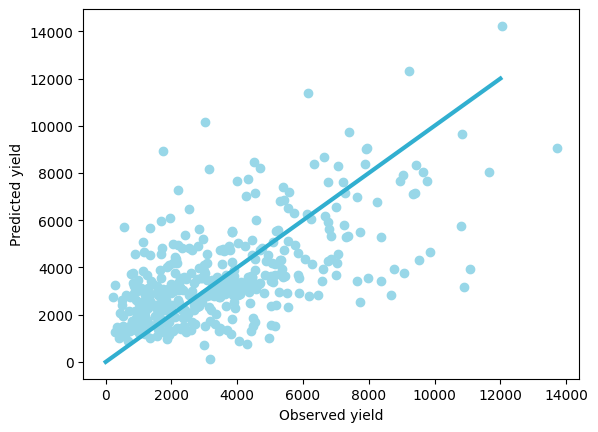

In [15]:
import matplotlib.pyplot as plt
plt.plot(y_test, y_test_pred, 'o', color="#98d7e8")
plt.plot([0, 12000], [0, 12000], color="#31afd0", linewidth=3)
plt.xlabel("Observed yield")
plt.ylabel("Predicted yield")

Nous pourrions affiner notre modèle avec plus de fonctionnalités, plus de données, de meilleurs paramètres de modélisation et laisser plus de temps. Mais le modèle est acceptable pour l’atelier. Sauvons notre modèle.

In [16]:
from joblib import dump
dump(reg, "results/model.joblib") 

['results/model.joblib']

Notez que le prétraitement aurait également pu être inclus dans le fichier joblib en utilisant les [pipelines](https://scikit-learn.org/stable/modules/compose.html#combining-estimators).

## Utilisez votre modèle

Pour utiliser réellement votre modèle, vous pouvez créer un nouveau tableau CSV avec les noms exacts des colonnes et entrer les informations d’un cas que vous souhaitez prédire. Il suffit de supprimer la colonne `y` (ici, supprimez 'yield'), et le tour est joué.

In [17]:
my_case = pl.read_csv('data/df_pred.csv')
my_case

shape: (1, 18)
┌────────┬────────┬────────┬─────┬───┬──────────┬─────────┬─────────┬─────────┐
│ dose N ┆ dose P ┆ dose K ┆ pH  ┆ … ┆ soil P   ┆ soil K  ┆ soil Ca ┆ soil Mg │
│ ---    ┆ ---    ┆ ---    ┆ --- ┆   ┆ ---      ┆ ---     ┆ ---     ┆ ---     │
│ i64    ┆ i64    ┆ i64    ┆ f64 ┆   ┆ f64      ┆ f64     ┆ f64     ┆ f64     │
╞════════╪════════╪════════╪═════╪═══╪══════════╪═════════╪═════════╪═════════╡
│ 20     ┆ 20     ┆ 20     ┆ 4.2 ┆ … ┆ 0.000081 ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 │
└────────┴────────┴────────┴─────┴───┴──────────┴─────────┴─────────┴─────────┘

N’oubliez pas que le modèle demande des données prétraitées!

In [18]:
my_case_sc = X_scaler.transform(my_case)

my_pred = y_scaler.inverse_transform(
  reg.predict(
    my_case_sc
  ).reshape(-1, 1)
).flatten()

my_pred

array([6983.73725848])

## Conditionnez votre modèle

Une façon très astucieuse d’utiliser notre modèle pour corriger certaines caractéristiques tout en en variant d’autres. Dans notre ensemble de données, le dosage des engrais peut être géré *en fonction* des résultats de l’analyse du sol et *donné* de l’historique des conditions météorologiques dans la région. Ce processus s’appelle *conditionnement*.

Le paquet Scipy a [optimiseurs utiles](https://docs.scipy.org/doc/scipy/tutorial/optimize.html), et nous pourrions les utiliser pour trouver la meilleure combinaison de doses. Mais pour faire simple, nous allons générer un grand tableau rempli de 10 000 combinaisons de doses aléatoires, puis retenir celle qui a le rendement le plus élevé.

In [19]:
n_cases = 10000

conditioned_df = pl.DataFrame(
  {
    'dose N': np.random.uniform(0, 30, n_cases),
    'dose P': np.random.uniform(0, 30, n_cases),
    'dose K': np.random.uniform(0, 30, n_cases),
    'pH': 4.2,
    'prec 1': 72,
    'prec 2': 110,
    'prec 3': 60,
    'prec 4': 120,
    'prec 5': 80,
    'temp 1': 2.1,
    'temp 2': 10,
    'temp 3': 14,
    'temp 4': 18,
    'temp 5': 17,
    'soil P': 8.1e-5,
    'soil K': 1.6e-4,
    'soil Ca': 3.8e-4,
    'soil Mg': 2.8e-4
  }
)

Au tableau `contitioned_df`, nous ajoutons une nouvelle colonne comprenant les rendements prévus.

In [20]:
conditioned_pred = (
    y_scaler
    .inverse_transform(reg.predict(X_scaler.transform(conditioned_df.to_numpy())).reshape(-1, 1))
    .flatten()
)

conditioned_df = (
    conditioned_df
    .with_columns(pl.lit(conditioned_pred).alias('yield predicted'))
)

conditioned_df

/Users/essi/mambaforge/envs/dl/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


shape: (10_000, 19)
┌───────────┬───────────┬───────────┬─────┬───┬─────────┬─────────┬─────────┬─────────────────┐
│ dose N    ┆ dose P    ┆ dose K    ┆ pH  ┆ … ┆ soil K  ┆ soil Ca ┆ soil Mg ┆ yield predicted │
│ ---       ┆ ---       ┆ ---       ┆ --- ┆   ┆ ---     ┆ ---     ┆ ---     ┆ ---             │
│ f64       ┆ f64       ┆ f64       ┆ f64 ┆   ┆ f64     ┆ f64     ┆ f64     ┆ f64             │
╞═══════════╪═══════════╪═══════════╪═════╪═══╪═════════╪═════════╪═════════╪═════════════════╡
│ 19.820557 ┆ 27.99308  ┆ 3.882409  ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 5941.737992     │
│ 2.724531  ┆ 18.488006 ┆ 20.244209 ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 6452.709397     │
│ 12.628953 ┆ 23.131366 ┆ 25.305571 ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 6196.183624     │
│ 9.55911   ┆ 22.009745 ┆ 16.251085 ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 6276.83445      │
│ …         ┆ …         ┆ …         ┆ …   ┆ … ┆ …       ┆ …       ┆ …       ┆ …               │
│ 7.912743  ┆ 21.442842 ┆ 20.284319 ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 6282.923992     │
│ 11.43063  ┆ 9.651795  ┆ 6.017097  ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 8243.74476      │
│ 22.079322 ┆ 7.482179  ┆ 23.76611  ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 9407.76767      │
│ 20.760645 ┆ 8.629066  ┆ 16.449795 ┆ 4.2 ┆ … ┆ 0.00016 ┆ 0.00038 ┆ 0.00028 ┆ 9159.984803     │
└───────────┴───────────┴───────────┴─────┴───┴─────────┴─────────┴─────────┴─────────────────┘

Nous recherchons l’indice de ligne avec le rendement maximal prédit.

In [21]:
best_case = np.argmax(conditioned_df["yield predicted"])
best_case

1221

... et récupèrons la ligne correspondante, avec un dosage optimal!

In [22]:
(
    conditioned_df
    .slice(best_case, 1)
    .select(conditioned_df.columns[:3])
)

shape: (1, 3)
┌───────────┬──────────┬─────────┐
│ dose N    ┆ dose P   ┆ dose K  │
│ ---       ┆ ---      ┆ ---     │
│ f64       ┆ f64      ┆ f64     │
╞═══════════╪══════════╪═════════╡
│ 29.740603 ┆ 0.050348 ┆ 2.68082 │
└───────────┴──────────┴─────────┘

Une fois que nous avons notre modèle, nous pouvons le conditionner de toutes sortes de façons, comme rechercher un dosage optimal en fonction de la météo spécifique, mais voir comment il réagit avec des tests de sol. Attention, le modèle n’est pas valide pour les valeurs qui se trouvent en dehors de l'espace de l’ensemble de données d’origine. J’aurais pu créer des doses aléatoires dans une plage plus large (comme 0 à 50), mais comme il n’y a pas de telle dose dans l’ensemble de données original, cette extrapolation n’aurait aucun sens.

Habituellement, les dosages d’engrais sont prescrits à l’aide d’analyses de sol, de tableaux créés à l’aide d’essais de fertilisation et d’un jugement professionnel, souvent sans tenir compte des conditions locales importantes, comme les conditions météorologiques. 

# Faire de l’exercice

Nous disposons de données reliant la résistance à la compression du béton à son âge et à sa composition. Notre tâche est de modéliser la résistance à la compression dans le temps d’un béton de composition donnée.

L’ensemble de données provient de [Yeh (1998)](https://www.sciencedirect.com/science/article/abs/pii/S0008884698001653) et a été téléchargé à partir du [University of California - Irvine - Machine learning repository](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength).

In [46]:
concrete = pl.read_csv('data/Concrete_Data.csv')
concrete.head(5)

shape: (5, 9)
┌────────────┬────────────┬────────────┬───────────┬───┬───────────┬───────────┬───────┬───────────┐
│ Cement     ┆ Blast      ┆ Fly Ash    ┆ Water     ┆ … ┆ Coarse    ┆ Fine      ┆ Age   ┆ Compressi │
│ (kg/m³)    ┆ Furnace    ┆ (kg/m³)    ┆ (kg/m³)   ┆   ┆ Aggregate ┆ Aggregate ┆ (day) ┆ ve        │
│ ---        ┆ Slag       ┆ ---        ┆ ---       ┆   ┆ (kg/m³)   ┆ (kg/m³)   ┆ ---   ┆ strength  │
│ f64        ┆ (kg/m³)    ┆ f64        ┆ f64       ┆   ┆ ---       ┆ ---       ┆ i64   ┆ (MPa)     │
│            ┆ ---        ┆            ┆           ┆   ┆ f64       ┆ f64       ┆       ┆ ---       │
│            ┆ f64        ┆            ┆           ┆   ┆           ┆           ┆       ┆ f64       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════╪═══════════╡
│ 540.0      ┆ 0.0        ┆ 0.0        ┆ 162.0     ┆ … ┆ 1040.0    ┆ 676.0     ┆ 28    ┆ 79.99     │
│ 540.0      ┆ 0.0        ┆ 0.0        ┆ 162.0     ┆ … ┆ 1055.0    ┆ 676.0     ┆ 28    ┆ 61.89     │
│ 332.5      ┆ 142.5      ┆ 0.0        ┆ 228.0     ┆ … ┆ 932.0     ┆ 594.0     ┆ 270   ┆ 40.27     │
│ 332.5      ┆ 142.5      ┆ 0.0        ┆ 228.0     ┆ … ┆ 932.0     ┆ 594.0     ┆ 365   ┆ 41.05     │
│ 198.6      ┆ 132.4      ┆ 0.0        ┆ 192.0     ┆ … ┆ 978.4     ┆ 825.5     ┆ 360   ┆ 44.3      │
└────────────┴────────────┴────────────┴───────────┴───┴───────────┴───────────┴───────┴───────────┘

## Essayez-le !

Astuce : pour créer un vecteur d’âges compris entre 0 et 365 à l’étape 5, vous pouvez utiliser `np.linspace(start=0, stop=365, num=74)`.

Non, vraiment, essayez-le avant de consulter la solution!

## La solution

Comme précédemment, nous traçons une représentation bivariée des données.

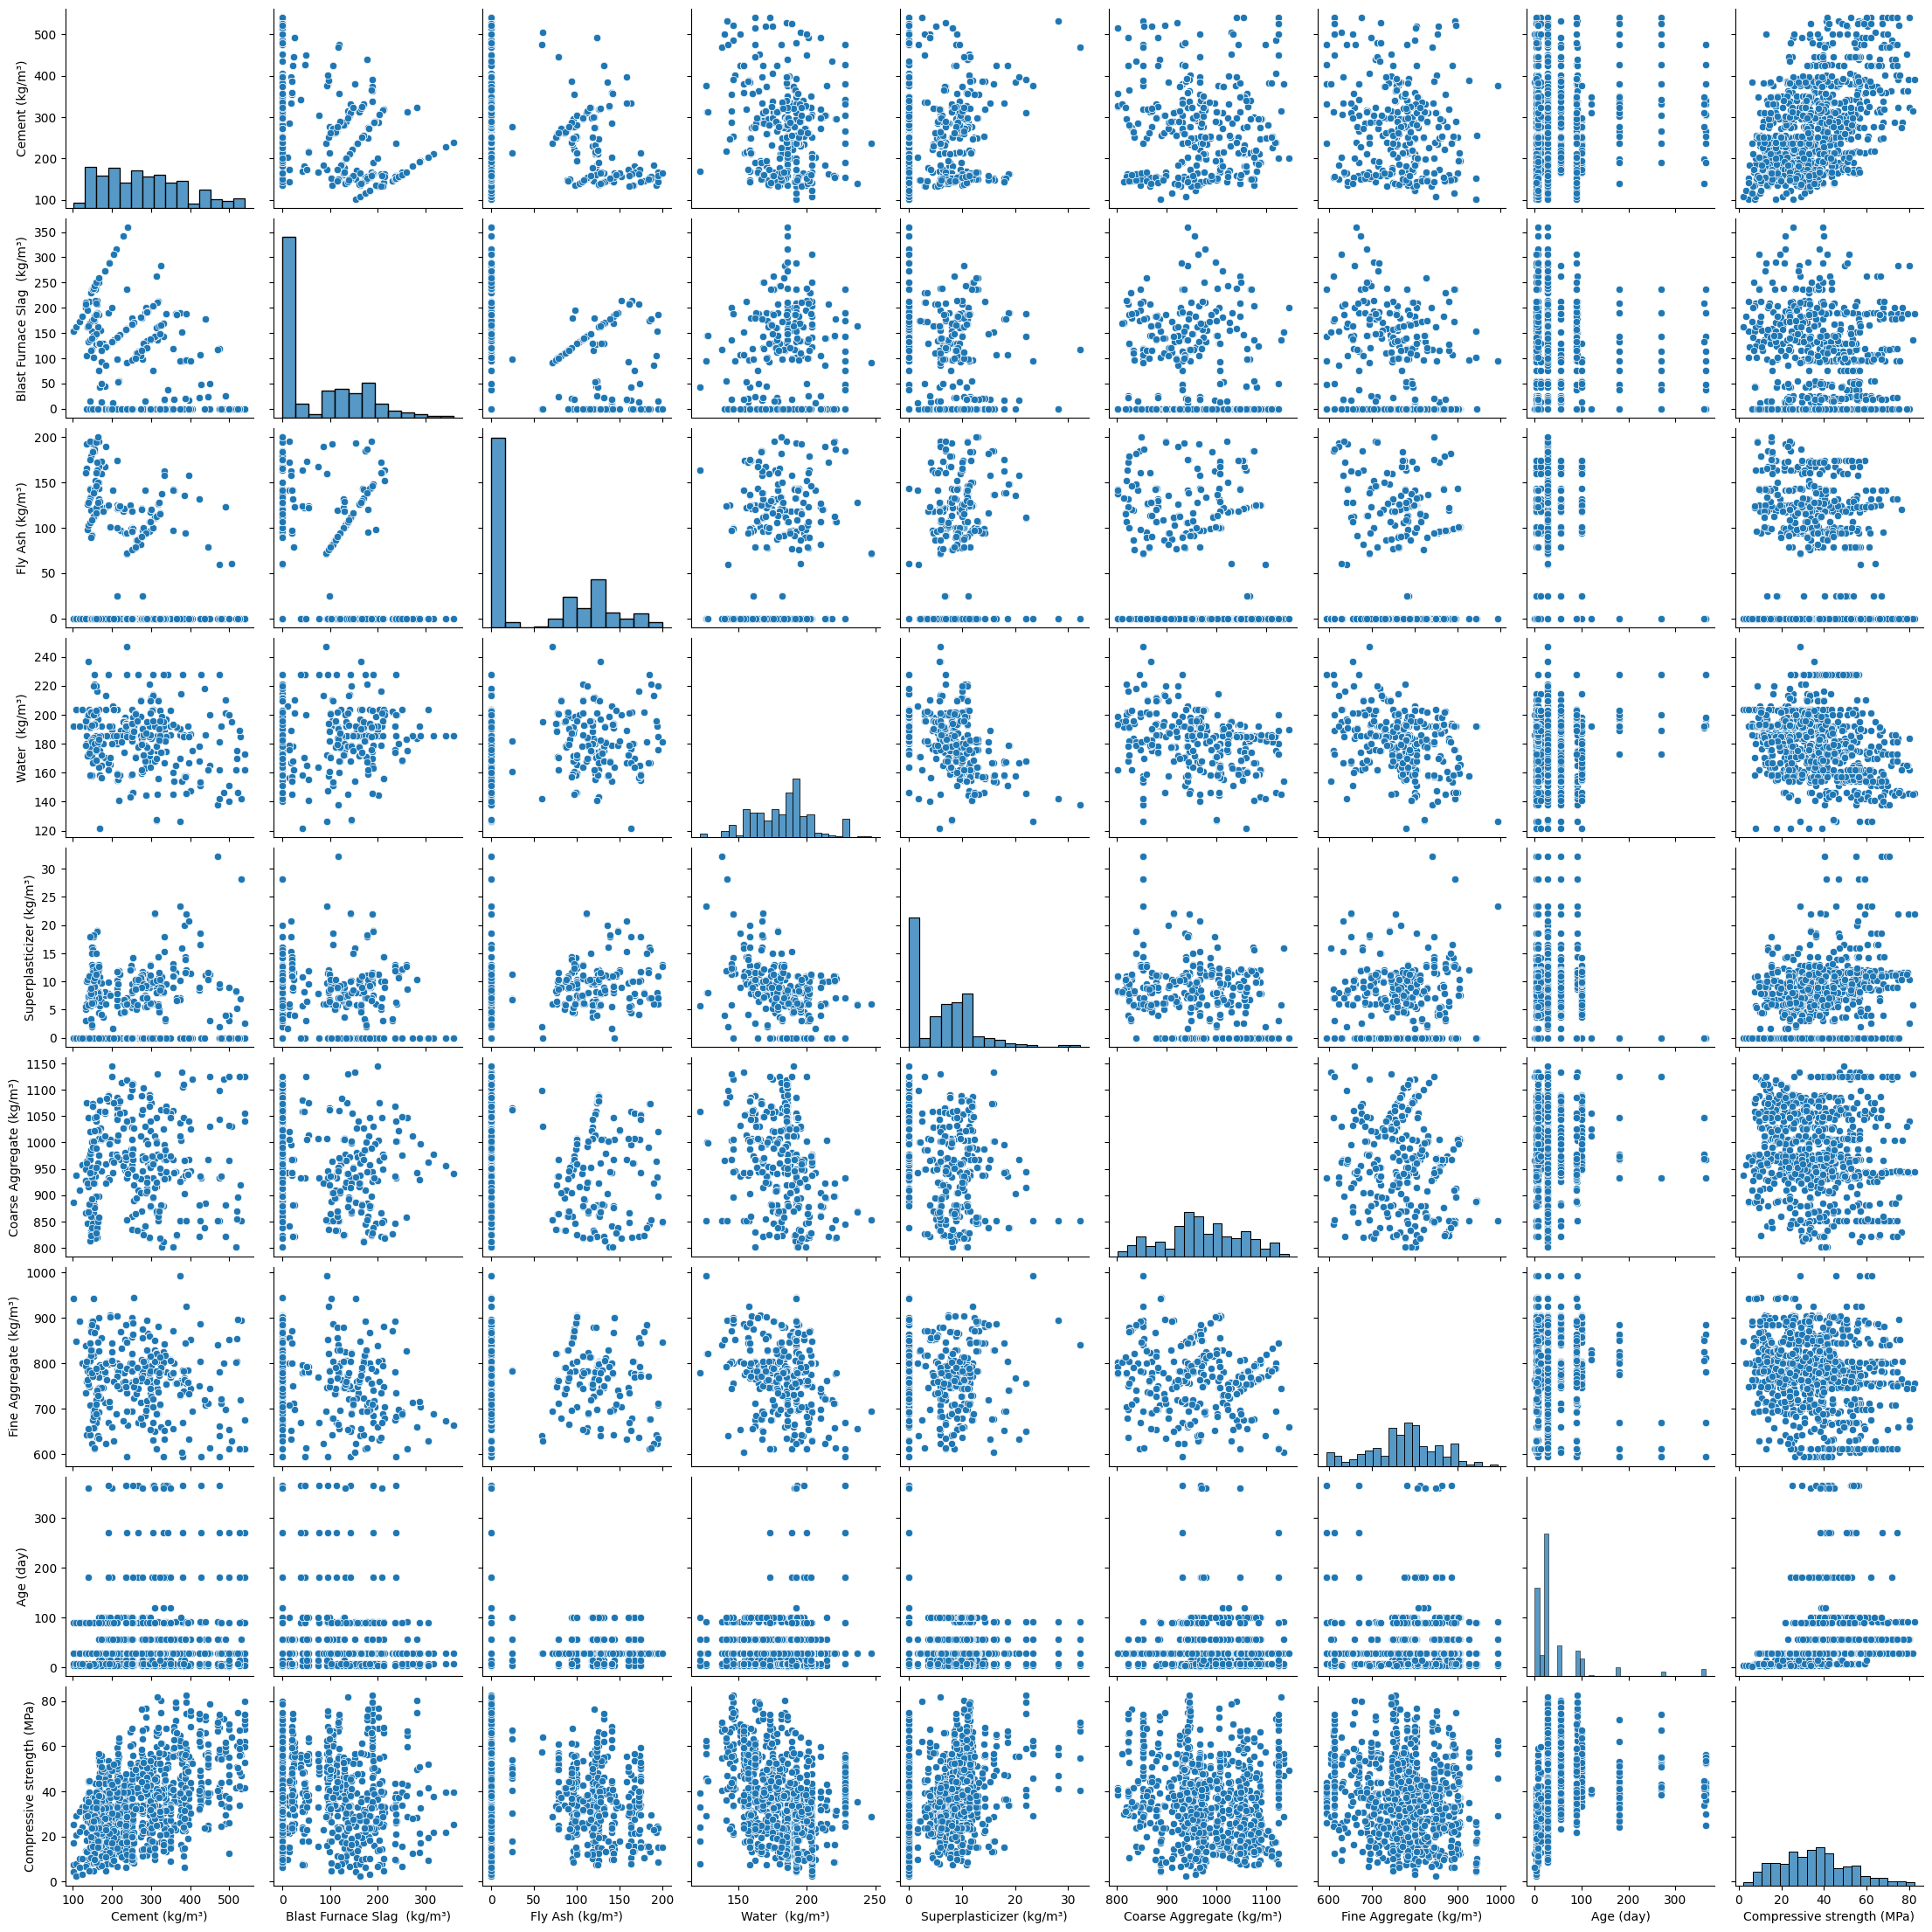

In [27]:
sns.pairplot(concrete.to_pandas())

Il y a des tendances claires. Nous avons besoin de nos features et de nos targets.

In [47]:
Xc = concrete.drop("Compressive strength (MPa)")
yc = concrete.select("Compressive strength (MPa)")

Que nous séparons...

In [48]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, train_size=0.7, random_state=948637)

Nous instancions notre objet modèle, puis nous l’ajustons. Essayons avec des forêts aléatoires cette fois-ci (le prétraitement n’est pas obligatoire avec des forêts aléatoires).

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg_concrete = RandomForestRegressor() # default arguments
reg_concrete.fit(Xc_train, yc_train)

/var/folders/7p/wk_02tlx73db7yv0wvbxc1jh0000gn/T/ipykernel_56257/3752620823.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_concrete.fit(Xc_train, yc_train)


RandomForestRegressor()

Nous évaluons le modèle sur l’ensemble de test.

Text(0, 0.5, 'Predicted yield')

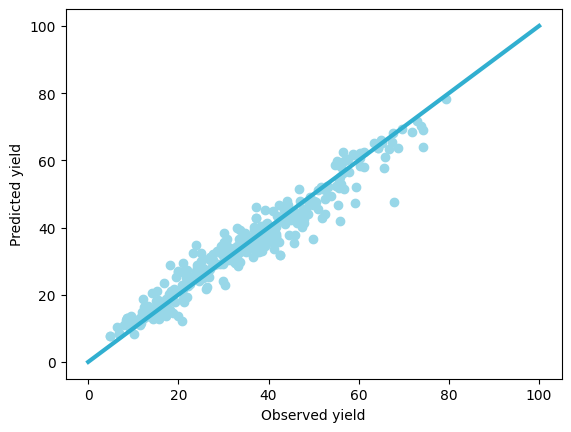

In [50]:
yc_test_pred = reg_concrete.predict(Xc_test)

plt.plot(yc_test, yc_test_pred, 'o', color="#98d7e8")
plt.plot([0, 100], [0, 100], color="#31afd0", linewidth=3)
plt.xlabel("Observed yield")
plt.ylabel("Predicted yield")

Conditionnons maintenant notre modèle. Nous gardons tout constant à l’exception du temps (`Age (day)`) pour deux cas différents de teneur en eau.

In [52]:
conditioned_c1 = pl.DataFrame(
    {
        'Cement (kg/m³)': 420,
        'Blast Furnace Slag (kg/m³)': 50,
        'Fly Ash (kg/m³)': 10,
        'Water (kg/m³)': 150,
        'Superplasticizer (kg/m³)': 0,
        'Coarse Aggregate (kg/m³)': 900,
        'Fine Aggregate (kg/m³)': 800,
        'Age (day)': np.linspace(0, 365, 74)
    }
)

conditioned_c2 = pl.DataFrame(
    {
        'Cement (kg/m³)': 420,
        'Blast Furnace Slag (kg/m³)': 50,
        'Fly Ash (kg/m³)': 10,
        'Water (kg/m³)': 250,
        'Superplasticizer (kg/m³)': 0,
        'Coarse Aggregate (kg/m³)': 900,
        'Fine Aggregate (kg/m³)': 800,
        'Age (day)': np.linspace(0, 365, 74)
    }
)

Nous prédisons ces cas et traçons la résistance à la compression en fonction du temps.

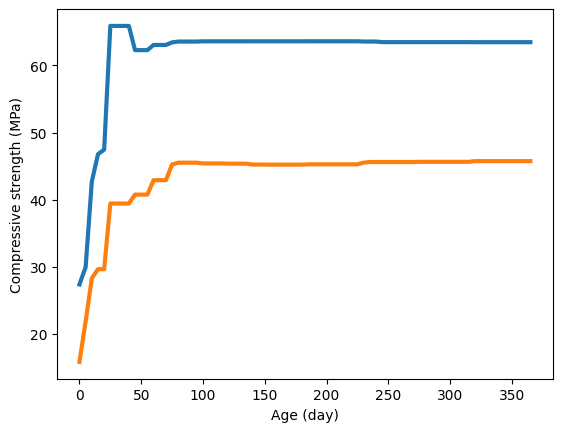

In [53]:
yc_cond1 = reg_concrete.predict(conditioned_c1)
yc_cond2 = reg_concrete.predict(conditioned_c2)

plt.plot(conditioned_c1.select("Age (day)").to_numpy(), yc_cond1.flatten(), linewidth=3)
plt.plot(conditioned_c2.select("Age (day)").to_numpy(), yc_cond2.flatten(), linewidth=3)
plt.xlabel("Age (day)")
plt.ylabel("Compressive strength (MPa)");

# En conclusion

À l’aide de l’auto-apprentissage, nous avons vu comment créer un modèle d’auto-apprentissage de base en Python et l’avons utilisé pour simuler les rendements pour différents dosages d’engrais en fonction des conditions spécifiques du site. Une telle stratégie a un grand potentiel pour éviter la surfertilisation causant l’eutrophisation de l’eau et peut également être appliquée dans d’autres domaines. Nous avons fait un exercice pour entraîner un modèle afin de prédire comment la résistance à la compression d’un béton évolue dans le temps. Avec l’aide de l’auto-apprentissage, les possibilités de modélisation phénoménologique sont nombreuses.